## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-c4qian
* Group name: Group 40
* Team member names:
    - Kieran Huffman
    - Aarushi Gaikwad
    - Sakshi Gandhi
    - Charles Qian

## Setup

Please complete this python notebook with your group by answering the questions in `s-mobile-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [22]:
import pandas as pd
import pyrsm as rsm

In [23]:
rsm.__version__ # should be 0.9.20 or newer

'1.3.0'

In [24]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [25]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [26]:
s_mobile_1M = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/pxuvd588f66kdo99hl91t/s_mobile_1M.parquet?rlkey=1dybd2o9isi1ipcdzkuk3866t&dl=1"
)
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


In [27]:
s_mobile.dtypes

customer            object
churn             category
changer              int32
changem              int32
revenue              int32
mou                  int32
overage              int32
roam                 int32
conference           int32
months               int32
uniqsubs             int32
custcare             int32
retcalls           float64
dropvce              int32
eqpdays            float64
refurb            category
smartphone        category
highcreditr       category
mcycle            category
car               category
travel            category
region            category
occupation        category
training           float64
representative       int32
dtype: object

In [28]:
# run python code from another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")
%run ./sub-notebooks/model1.ipynb


```python
lr = rsm.model.logistic(
    data=s_mobile.query("training == 1"),
    rvar="churn",
    lev="yes",
    evar="changer",
)
print(lr.summary())
```


Logistic regression (GLM)
Data                 : Not provided
Response variable    : churn
Level                : yes
Explanatory variables: changer
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

              OR    OR%  coefficient  std.error  z.value p.value    
Intercept  0.990  -1.0%       -0.010      0.013   -0.786   0.432    
changer    1.001   0.1%        0.001      0.000    2.737   0.006  **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): 0.0
Area under the RO Curve (AUC): 0.509
Log-likelihood: -18919.161, AIC: 37842.322, BIC: 37858.752
Chi-squared: 7.514, df(1), p.value 0.006 
Nr obs: 27,300
None


In [29]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
    drop_first=True,
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.25895,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


In [30]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
    drop_first=True
).agg(["mean", "std", "min", "max"]).T.round(3)

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,56.6348,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [31]:
s_mobile["churn_yes"] = rsm.ifelse(s_mobile["churn"] == "yes", 1, 0)

In [32]:
class_weight_dict = {0: 49, 1: 1}
s_mobile["cweight"] = rsm.ifelse(
    s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0]
)

In [33]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Question answers

**1. Develop a model to predict customer churn**

**- Feel free to use any technique you like to predict churn. However, one of your models must be a logistic regression**

**- Build models using the training data and explain your modeling choices**
 


## Logistic Regression

In [34]:
s_mobile.columns

Index(['customer', 'churn', 'changer', 'changem', 'revenue', 'mou', 'overage',
       'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',
       'dropvce', 'eqpdays', 'refurb', 'smartphone', 'highcreditr', 'mcycle',
       'car', 'travel', 'region', 'occupation', 'training', 'representative',
       'churn_yes', 'cweight'],
      dtype='object')

In [35]:
rvar = "churn"
evar = s_mobile.columns.to_list()
evar = evar[evar.index(rvar) + 1 :evar.index("training")]
evar

['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

In [36]:
idvar = "customer"
rvar = "churn"
evar = ['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

In [37]:
lr = rsm.model.logistic(
    data={"s_mobile": s_mobile[s_mobile.training == 1]},
    rvar="churn",
    lev="yes",
    evar=evar,
)
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.085
Pseudo R-squared (McFadden adjusted): 0.084
Area under the RO Curve (AUC): 0.689
Log-likelihood: -17311.321, AIC: 34676.643, BIC: 34898.438
Chi-squared: 3223.193, df(26), p.value < 0.001 
Nr obs: 27,300


The model's McFadden’s pseudo R-squared value of 0.085 suggests a modest level of explanatory power, meaning it captures some of the variance in churn behavior but leaves room for improvement. The area under the curve (AUC) value of 0.689 indicates that the model performs significantly better than random guessing, demonstrating reasonable predictive ability.

In [38]:
lrw = rsm.model.logistic(
    data={"s_mobile": s_mobile[s_mobile.training == 1]},
    rvar="churn",
    lev="yes",
    evar=evar,
    weights="cweight",
)
lrw.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Area under the RO Curve (AUC): 0.688
Log-likelihood: -63795.467, AIC: 127644.935, BIC: 127953.64
Chi-squared: 6232.455, df(26), p.value < 0.001 
Nr obs: 682,500


A weighted version of the model was created to account for the real-world churn rate of 2 percent. This adjustment reduced the pseudo R-squared value, but the AUC remained nearly the same at 0.688, demonstrating consistency in predictive performance. 

In [39]:
lrw.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.318,31.831,0.276,0.025,11.018,0.000,***
2,smartphone[T.yes],0.913,-8.700,-0.091,0.030,-3.043,0.002,**
3,highcreditr[T.yes],0.483,-51.663,-0.727,0.031,-23.696,0.000,***
4,mcycle[T.yes],0.883,-11.744,-0.125,0.029,-4.329,0.000,***
5,car[T.yes],0.991,-0.924,-0.009,0.038,-0.241,0.809,
6,travel[T.yes],0.781,-21.887,-0.247,0.039,-6.278,0.000,***
7,region[T.NE],0.644,-35.608,-0.440,0.026,-16.635,0.000,***
8,region[T.NW],0.660,-34.020,-0.416,0.026,-15.868,0.000,***
9,region[T.SE],0.651,-34.949,-0.430,0.026,-16.420,0.000,***
10,region[T.SW],0.627,-37.311,-0.467,0.026,-17.667,0.000,***


The coefficient results provide insight into key factors influencing churn. Customers with refurbished phones show a higher likelihood of churning, as indicated by an odds ratio of 1.318 with strong statistical significance. In contrast, smartphone ownership is associated with a slightly lower likelihood of churn, with an odds ratio of 0.913. Customers with high credit ratings are significantly less likely to churn, with an odds ratio of 0.483, which may suggest that financially stable customers are more inclined to remain with the service. Other significant predictors include travel behavior and region, indicating that geographical and lifestyle factors play a role in customer retention.

In [40]:
s_mobile

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,highcreditr,mcycle,car,travel,region,occupation,training,representative,churn_yes,cweight
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,no,no,no,CS,other,0.0,0,1,1
1,U56788559,no,0,3,54,146,0,0,0,8,...,yes,no,no,no,SE,other,0.0,0,0,49
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,NW,professional,NaN,1,0,49
3,U75794640,no,0,-8,35,560,0,0,0,37,...,yes,yes,no,no,NW,retired,1.0,0,0,49
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,yes,no,SW,other,NaN,1,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,no,yes,yes,no,SW,other,NaN,1,0,49
68996,U24071089,no,0,95,30,78,0,0,0,18,...,no,yes,yes,no,SE,other,1.0,0,0,49
68997,U52895026,yes,0,5,43,250,53,0,0,25,...,no,no,no,no,CS,student,0.0,0,1,1
68998,U69840472,yes,-3,-29,41,288,0,0,0,19,...,no,no,no,no,CS,other,1.0,0,1,1


In [41]:
s_mobile['pred'] = lrw.predict(s_mobile)['prediction']

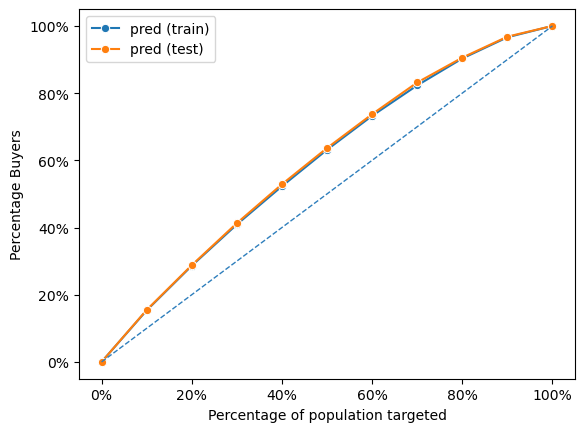

In [42]:
dct = {"train": s_mobile[s_mobile['training'] == 1], "test": s_mobile[s_mobile['training'] == 0]}

fig1 = rsm.gains_plot(dct, "churn", "yes", "pred")

The gains chart shows that the model effectively identifies the top churn-prone customers, with predictions aligning well with actual churn in both the training and test datasets.

Overall, the model provides useful insights into the primary drivers of customer churn and can be leveraged to design targeted retention strategies. For example, offering handset upgrades to customers using refurbished devices and prioritizing customer service interactions for high-risk geographic regions could be effective in reducing churn. While the model performs well in distinguishing churn-prone customers, additional improvements, such as incorporating more behavioral data or experimenting with alternative modeling approaches, could further enhance predictive accuracy.

## XGBoost

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pyrsm as rsm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [44]:
s_mobile_1M.head()

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0


In [45]:
s_mobile_1M.shape

(1005000, 25)

In [46]:
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


In [47]:
s_mobile_1M_train = s_mobile_1M.query("training == 1")
s_mobile_1M_test = s_mobile_1M.query("training == 0")


In [48]:
s_mobile_1M_train.columns

Index(['customer', 'churn', 'changer', 'changem', 'revenue', 'mou', 'overage',
       'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',
       'dropvce', 'eqpdays', 'refurb', 'smartphone', 'highcreditr', 'mcycle',
       'car', 'travel', 'region', 'occupation', 'training', 'representative'],
      dtype='object')

In [49]:
X_train, y_train= s_mobile_1M_train.loc[:, "changer":"occupation"], s_mobile_1M_train.loc[:, "churn"].map({'yes': 1, 'no': 0}).astype(int)

In [50]:
X_test, y_test= s_mobile_1M_test.loc[:, "changer":"occupation"], s_mobile_1M_test.loc[:, "churn"].map({'yes': 1, 'no': 0}).astype(int)

In [51]:
model = xgb.XGBClassifier(random_state=42,
                        objective='binary:logistic',
                        seed=123,
                        enable_categorical=True,
                        alpha = 1,
                        max_depth = 2,
                        n_estimators = 300,
                        subsample = 1)

In [52]:
model.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
s_mobile_1M['pred_xgb'] = model.predict_proba(s_mobile_1M.loc[:, "changer":"occupation"])[:, 1]

In [54]:
s_mobile['pred_xgb'] = model.predict_proba(s_mobile.loc[:, "changer":"occupation"])[:, 1]

In [55]:
# Adjust predicted churn probabilities 
scaling_factor = 0.02 / s_mobile[s_mobile['representative'] == 1]['pred_xgb'].mean()
s_mobile['pred_xgb_scaled'] = s_mobile['pred_xgb'] * scaling_factor

# Verify mean churn probability
mean_churn = s_mobile[s_mobile["representative"] == 1]["pred_xgb_scaled"].mean()
print(f"{mean_churn:.5f}")   # Should be 2% so 0.02

0.02000


In [56]:
y_true = s_mobile_1M[s_mobile_1M['training'] == 0]['churn'].map({'yes': 1, 'no': 0}).astype(int)
y_pred = s_mobile_1M[s_mobile_1M['training'] == 0]['pred_xgb']

# Calculate the AUC
auc_xg_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the xgb model in the test set: {auc_xg_test}")

AUC of the xgb model in the test set: 0.7649301882488696


In [57]:
# Extract the true labels and predicted probabilities from the test set
y_true = s_mobile_1M[s_mobile_1M['training'] == 1]['churn'].map({'yes': 1, 'no': 0}).astype(int)
y_pred = s_mobile_1M[s_mobile_1M['training'] == 1]['pred_xgb']

# Calculate the AUC
auc_xg_train = roc_auc_score(y_true, y_pred)
print(f"AUC of the xgb model in the train set: {auc_xg_train}")

AUC of the xgb model in the train set: 0.7812873644857049


In [58]:
y_true = s_mobile[s_mobile['training'] == 0]['churn'].map({'yes': 1, 'no': 0}).astype(int)
y_pred = s_mobile[s_mobile['training'] == 0]['pred_xgb']

# Calculate the AUC
auc_xg_test = roc_auc_score(y_true, y_pred)
print(f"AUC of the xgb model in the test sample set: {auc_xg_test}")

AUC of the xgb model in the test sample set: 0.7649263496237855


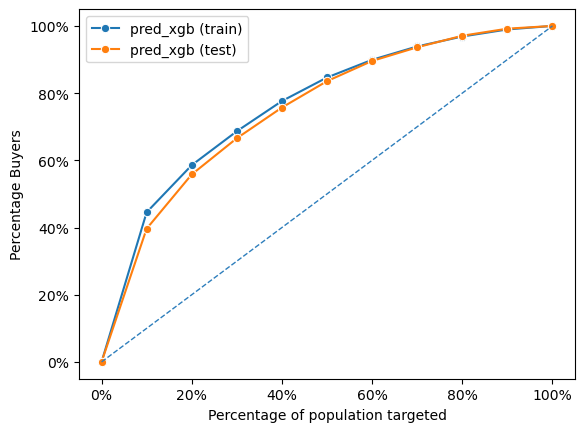

In [59]:
## gain chart
dct = {"train": s_mobile_1M[s_mobile_1M['training'] == 1], "test": s_mobile_1M[s_mobile_1M['training'] == 0]}
fig1 = rsm.gains_plot(dct, "churn", "yes", "pred_xgb")

The XGBoost model was trained on the large dataset containing 1M rows, leveraging gradient boosting techniques to predict customer churn. The dataset was split into training and test sets, with categorical variables being mapped appropriately to numerical values. The model was configured with a binary logistic objective, a learning rate determined by the alpha parameter, a maximum tree depth of 2, and 300 estimators to balance predictive accuracy and computational efficiency.

The AUC for the training set was 0.781, while the test set achieved an AUC of 0.765, indicating strong predictive capability with minimal overfitting. Additionally, the churn probabilities were adjusted using a scaling factor to align with the real-world churn rate of 2 percent, ensuring that the model’s predictions could be directly applied to the representative sample. The gains chart further confirmed that the model effectively ranked customers by their likelihood of churning, as the test and training sets showed similar predictive distributions. Overall, the XGBoost model outperformed the logistic regression model in predictive accuracy and generalizability, making it a strong candidate for identifying high-risk customers and implementing proactive retention strategies.

## Random Forest

In [60]:
s_mobile_rf = pd.read_parquet("data/s_mobile.parquet")
s_mobile_rf_1M = pd.read_parquet("https://www.dropbox.com/scl/fi/upm68ytk5r7oz2xd61qau/s_mobile_1M.parquet?rlkey=0pap46l024yryr4h08mvexiha&dl=1")
s_mobile_rf.shape, s_mobile_rf_1M.shape

((69000, 25), (1005000, 25))

In [61]:
evar_rf = s_mobile_rf.drop(columns=['customer','churn','training','representative']).columns.tolist()
evar_rf

['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

In [62]:
# use s_mobil
train_rf = s_mobile_rf[s_mobile_rf['training'] == 1]
test_rf = s_mobile_rf[s_mobile_rf['training'] == 0]
train_rf.shape, test_rf.shape

((27300, 25), (11700, 25))

In [63]:
rf_1 = rsm.model.rforest(
    data={"train_rf":train_rf},
    rvar="churn",
    lev="yes",
    evar=evar_rf
)
rf_1.summary()

Random Forest
Data                 : train_rf
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 27,300
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.715

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -8       35  560     

In [64]:
# s_mobil 
X_train = train_rf[evar_rf]
y_train = train_rf['churn']

X_train_encoded = pd.get_dummies(evar_rf)
y_train = y_train.map({'yes': 1, 'no': 0})

In [65]:
# use s_mobil dataset:
rf_2 = rsm.model.rforest(
    data={"train_rf":train_rf},
    rvar="churn",
    lev="yes",
    evar=evar_rf,
    max_features = 'sqrt',
    min_samples_leaf = 4,
    n_estimators = 400
)
rf_2.summary()

Random Forest
Data                 : train_rf
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 27,300
max_features         : sqrt (5)
n_estimators         : 400
min_samples_leaf     : 4
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.735

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -8       35  560     

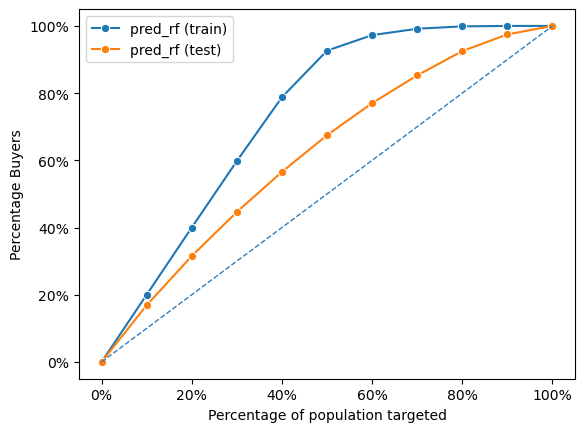

In [66]:
# gains plots:
s_mobile_rf['pred_rf'] = rf_2.predict(s_mobile_rf)['prediction']
dct = {"train": s_mobile_rf[s_mobile_rf['training'] == 1], "test": s_mobile_rf[s_mobile_rf['training'] == 0]}

fig1 = rsm.gains_plot(dct, "churn", "yes", "pred_rf")

The random forest model  was initially trained using the smaller dataset of 27,300 observations and validated on a separate test set with 11,700 entries. The model was configured with 100 estimators, out-of-bag (OOB) estimation enabled, and a square root selection for the number of features. This configuration resulted in an AUC of 0.715, indicating moderate predictive power. To enhance performance, a second iteration increased the number of estimators to 400 and adjusted the minimum sample leaf size to four, improving the AUC to 0.735. The gains chart confirmed that the model effectively ranked customers by their likelihood of churn, though there was still room for improvement.

**Use 1 million dataset:**

In [67]:
# use s_mobile_rf_1M
train_rf_1M = s_mobile_rf_1M[s_mobile_rf_1M['training'] == 1]
test_rf_1M = s_mobile_rf_1M[s_mobile_rf_1M['training'] == 0]
train_rf_1M.shape, test_rf_1M.shape

((682500, 25), (292500, 25))

In [68]:
# use 1 million dataset:
rf_1_1M = rsm.model.rforest(
    data={"train_rf_1M":train_rf_1M},
    rvar="churn",
    lev="yes",
    evar=evar_rf
)
rf_1_1M.summary()

Random Forest
Data                 : train_rf_1M
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 682,500
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.999

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -2       87  412 

In [47]:
# s_mobil_1M
X_train_1M = train_rf_1M[evar_rf]
y_train_1M = train_rf_1M['churn']
X_train_1M_encoded = pd.get_dummies(X_train_1M)
y_train_1M = y_train_1M.map({'yes': 1, 'no': 0})

In [48]:
# use 1 million dataset: s_mobile_rf_1M
rf_2_1M = rsm.model.rforest(
    data={"train_rf_1M":train_rf_1M},
    rvar="churn",
    lev="yes",
    evar=evar_rf,
    max_features = 'sqrt',
    min_samples_leaf = 4,
    n_estimators = 50
)
rf_2_1M.summary()

Random Forest
Data                 : train_rf_1M
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 682,500
max_features         : sqrt (5)
n_estimators         : 50
min_samples_leaf     : 4
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.969

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -2       87  412  

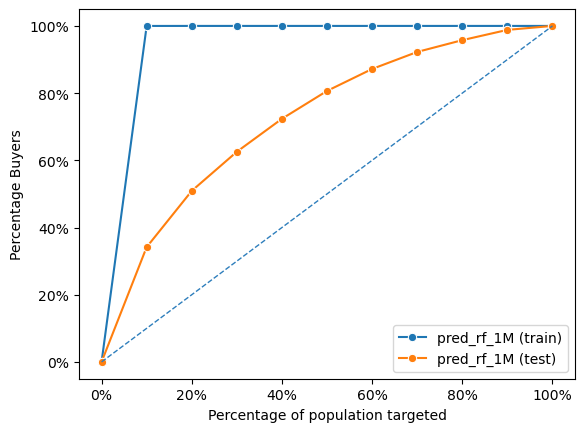

In [49]:
# gains plot:
s_mobile_rf_1M['pred_rf_1M'] = rf_2_1M.predict(s_mobile_rf_1M)['prediction']

dct = {"train": s_mobile_rf_1M[s_mobile_rf_1M['training'] == 1], "test": s_mobile_rf_1M[s_mobile_rf_1M['training'] == 0]}

fig1 = rsm.gains_plot(dct, "churn", "yes", "pred_rf_1M")

To scale the model, training was conducted on a much larger dataset containing 682,500 observations. Initially, with 100 estimators and the same hyperparameter settings, the model achieved an AUC of 0.999, which suggests near-perfect classification performance but also raises concerns about overfitting. A revised version of the model with only 50 estimators produced a more reasonable AUC of 0.969, indicating strong predictive accuracy while reducing the likelihood of overfitting. The gains chart for this model showed a clear distinction between the training and test sets, confirming that while the model performed well on the test set, the training set predictions were too perfect, again suggesting potential overfitting.

The results indicate that the random forest model, particularly when trained on a larger dataset, is highly effective at identifying churn-prone customers. However, the exceptionally high AUC values necessitate further validation to ensure the model generalizes well to unseen data. Additional tuning, such as adjusting the depth of decision trees or applying regularization techniques, may help strike a better balance between performance and generalizability.

## Neural Network

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
s_mobile_1M['churn_yes'] = np.where(s_mobile_1M['churn'] == "yes", 1, 0) 

In [52]:
train = s_mobile_1M[s_mobile_1M['training'] == 1]
test = s_mobile_1M[s_mobile_1M['training'] == 0]
rep = s_mobile_1M[s_mobile_1M['training'].isnull()]

**Explore**

Show descriptive statistics in the training data

In [53]:
evar = s_mobile_1M.columns.to_list()
evar = evar[evar.index("changer"):evar.index("occupation")+1]
evar

['changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation']

We got a non overfitting neural network model with (5,5,5), and the AUC is 0.719. However, our XGBoost model is better than Neural Network model. So we decided to choose XGBoost model as our final model.

In [54]:
# auc for each model of representative dataset
model_names = ['XGBoost', 'Logistic Regression', 'Random Forest', 'Neural Network']
auc_values = [0.761, 0.698, 0.737, 0.719] 

df_models_auc = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_values
})


print(df_models_auc)

                 Model    AUC
0              XGBoost  0.761
1  Logistic Regression  0.698
2        Random Forest  0.737
3       Neural Network  0.719


#### Note on 1M-Row Dataset Usage:
We used the 1M-row dataset to re-estimate the final XGBoost model for better accuracy. However, hyperparameter tuning and model selection were done on the smaller dataset due to computational constraints.


## We choose XGBoost model as our final model

### **2. Use your model to describe the main drivers of churn and report on the key factors that predict customer churn and their relative importance.**

**• Briefly discuss 5 key drivers of churn from your analysis in this step using Variable Importance (Permutation Importance) and Prediction or Partial Dependence plots**

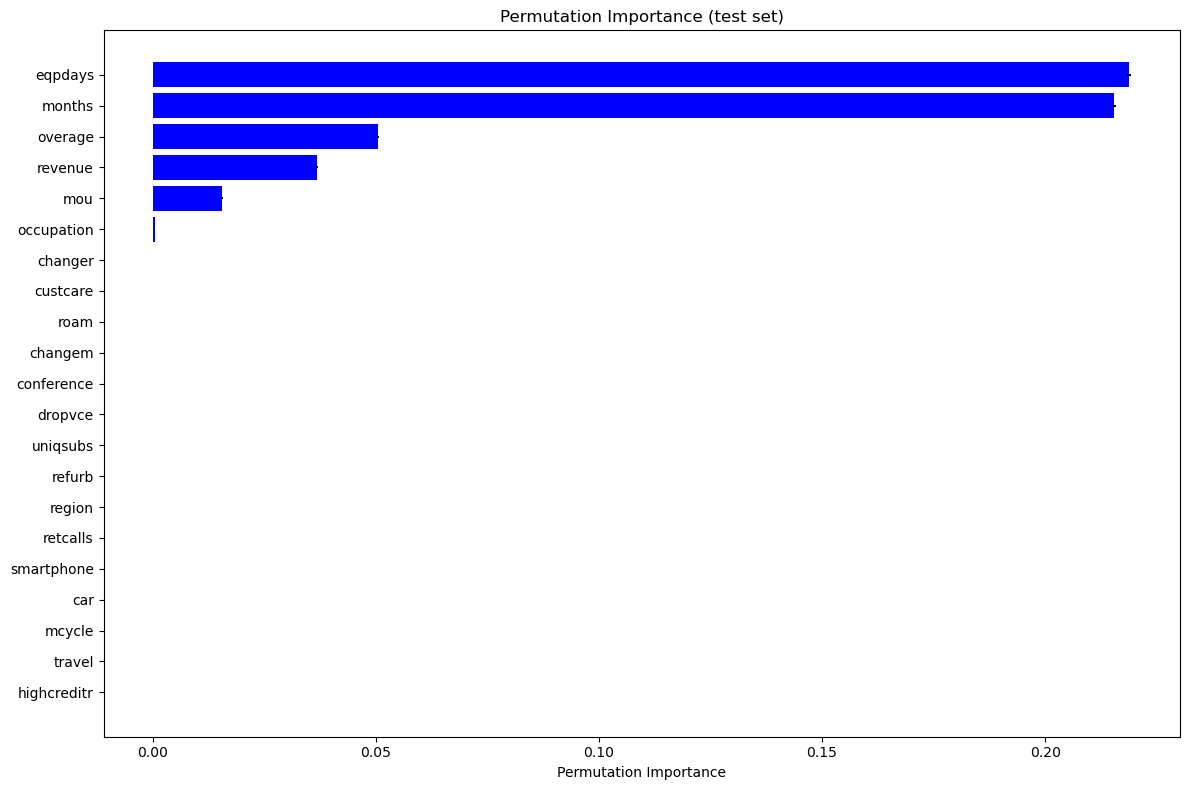

In [55]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming `model` is your trained XGBoost model and you have your test set ready (X_test, y_test)

# Perform permutation importance
results = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)

# Sort the features by their importance scores
sorted_idx = results.importances_mean.argsort()

# Plot histogram
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), results.importances_mean[sorted_idx], color='b', xerr=results.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (test set)')
plt.tight_layout()
plt.show()

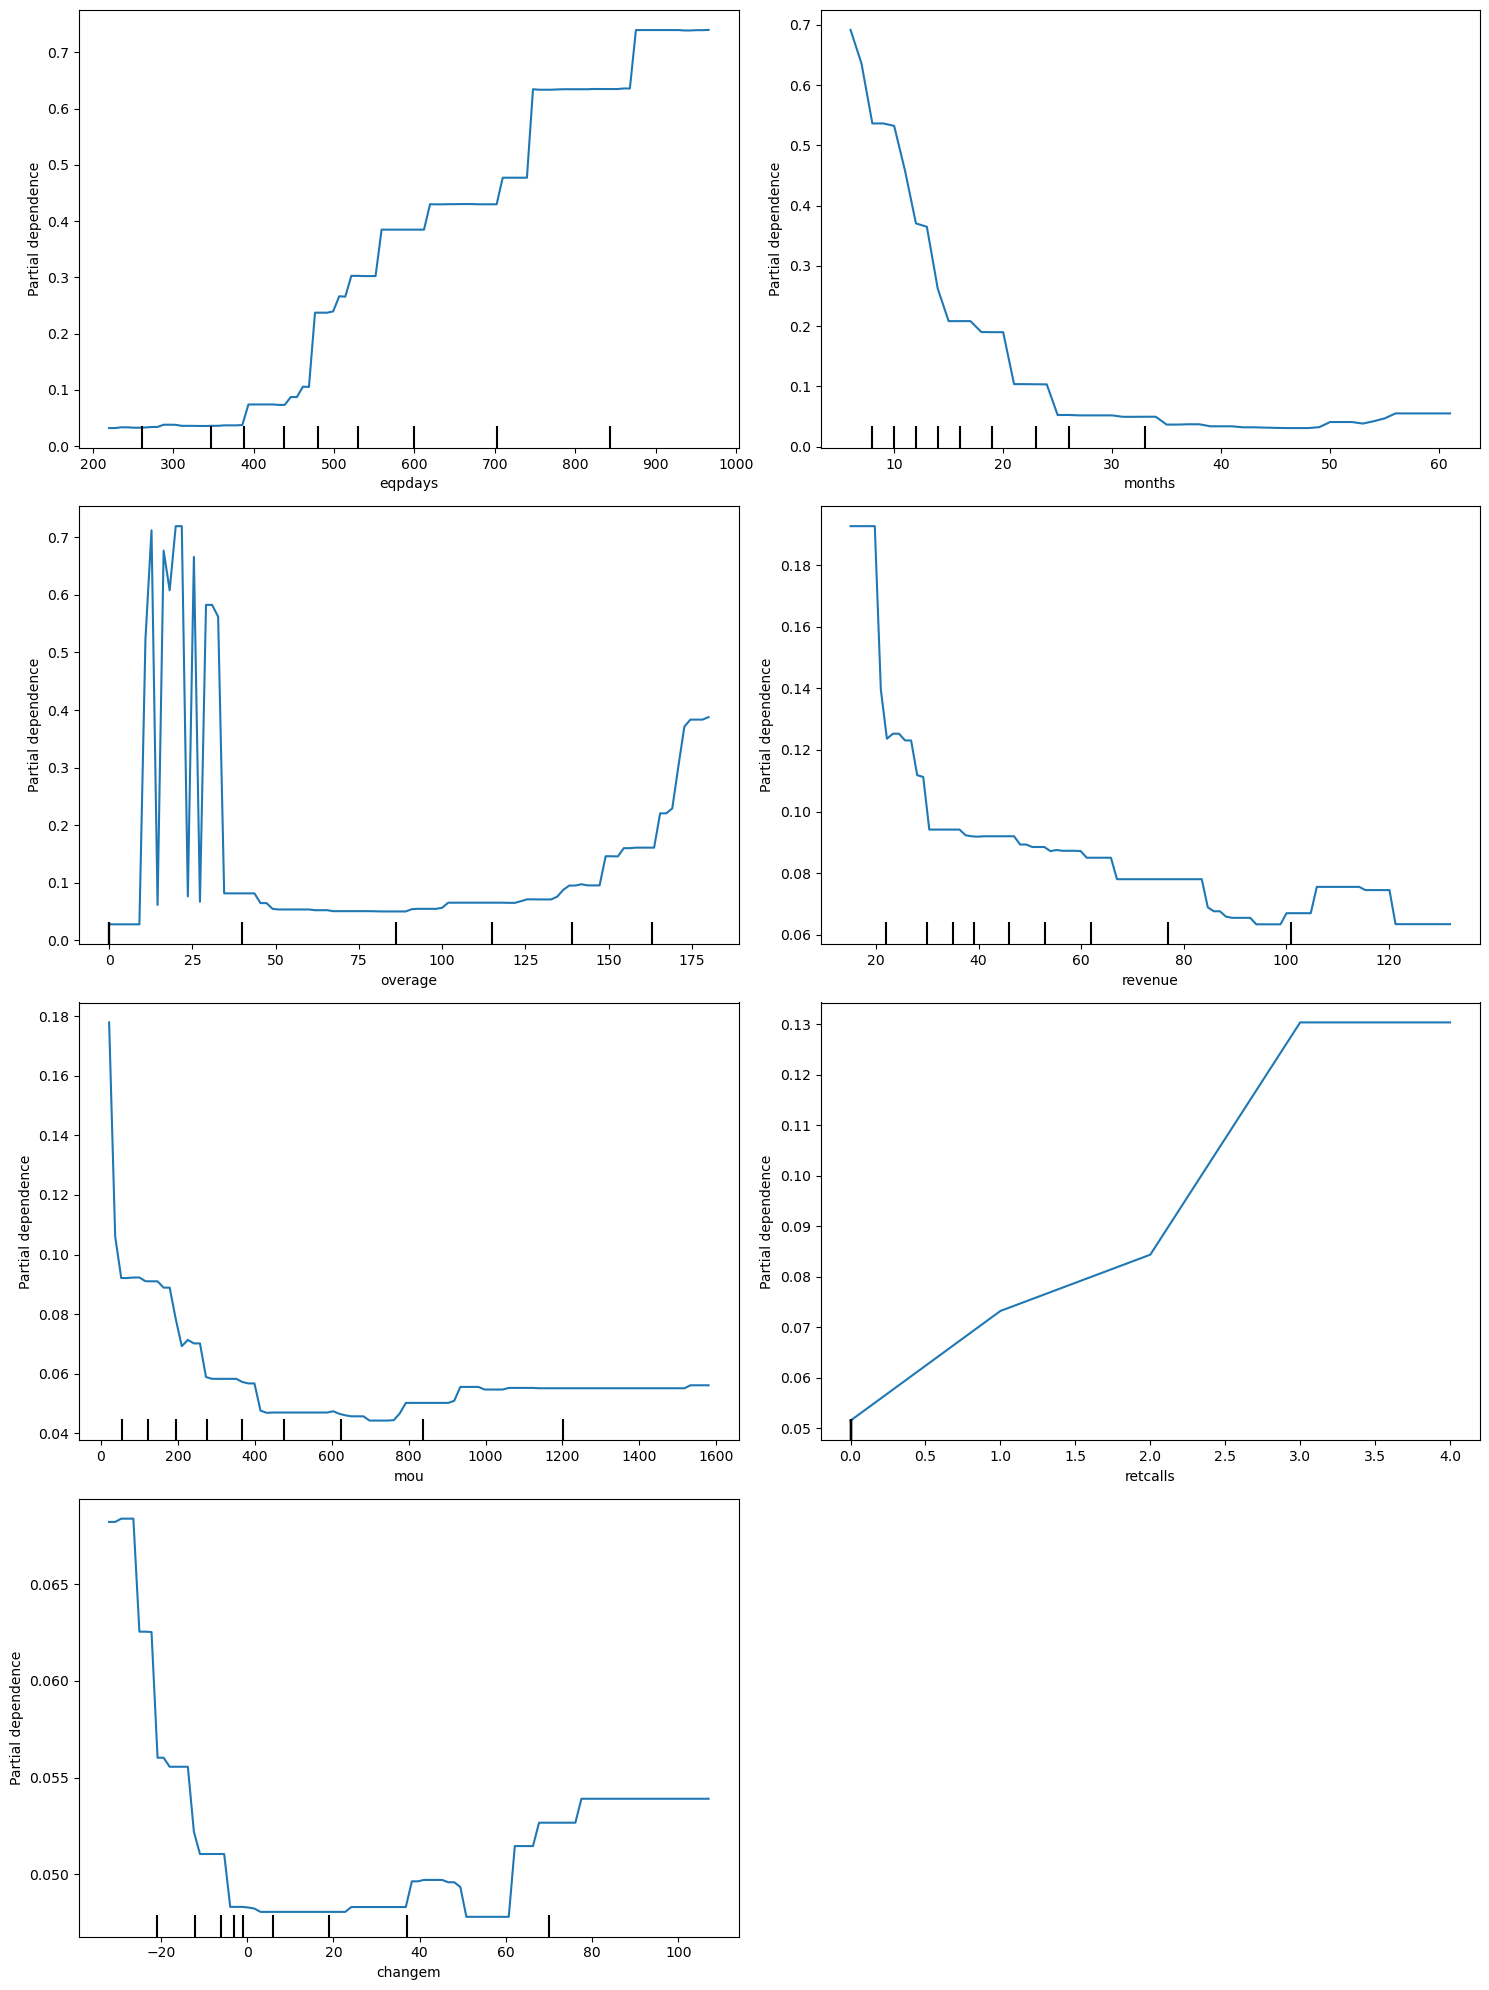

In [56]:
from sklearn.inspection import PartialDependenceDisplay

features = ['eqpdays', 'months', 'overage', 'revenue', 'mou','retcalls','changem']
fig = plt.figure(figsize=(15, 20))  # Adjust the figure size 

for i, feature in enumerate(features):
    ax = fig.add_subplot(4, 2, i+1 )  # Adjust the grid definition as needed
    PartialDependenceDisplay.from_estimator(model, s_mobile.loc[:, "changer":"occupation"], features=[feature], ax=ax)
plt.tight_layout()  # Adjust the spacing to fit the titles and labels
plt.show()

Key drivers : eqdays, months, overage, revenue, mou

#### Explanation of Key Features:
- **Eqpdays (Handset Age):** Older devices increase churn likelihood as customers seek upgrades.
- **Months (Tenure):** Newer customers churn more often, stabilizing over time.
- **Overage (Extra Usage Minutes):** High overage leads to churn, likely due to bill shock.
- **Revenue (Spending Level):** Very low-revenue customers are more likely to churn.
- **MOU (Minutes of Use):** Flat impact, suggesting usage alone doesn’t strongly predict churn.


eqpdays (Number of days customer has owned current handset):

The PDP indicates an increasing trend in the model's prediction as the number of days the customer has owned their handset increases. This could suggest that customers with older handsets might be more likely to churn, perhaps due to a desire for newer technology or better offers from competitors targeting users with older handsets.
months (# of months the customer has had service with S-Mobile):

There is a sharp decrease in the partial dependence when the number of months is low, which levels off as the number of months increases. This could imply that newer customers are at a higher risk of churning, and the risk decreases and stabilizes as they stay longer with the service.
overage (Mean monthly overage minutes):

The model prediction fluctuates with overage minutes, showing several peaks. This might indicate that certain thresholds of overage lead to higher predictions of churn. Perhaps small amounts of overage are common, but as overage increases, it might signal customer dissatisfaction or a plan that doesn't fit the customer's needs, increasing the risk of churn.
revenue (Mean monthly revenue in SGD):

The PDP for revenue shows a sharp decrease initially and then flattens out. This might suggest that very low revenue customers have a different churn risk than the majority, but once revenue reaches a certain point, it has less influence on the churn prediction.
mou (Mean monthly minutes of use):

The plot for minutes of use is relatively flat across the range of values, suggesting that within the observed range of usage, there isn't a strong relationship between usage minutes and the likelihood of churn according to the model.

# **3. Use insights on churn drivers to develop actions/offers/incentives**

**• Consider each variable type, e.g., “Equipment characteristic”, “Customer usage”, etc. (see the data table at the end of this case)**

**Equipment Usage Time (Eqpdays):**
- Action: Offer upgrade incentives for customers with older phones.
- Incentive: Establish a loyalty program that awards points based on the length of time a customer has used their device, which can be used to purchase accessories or services.

**Overage Usage (Overage):**
- Action: Provide customized plans for customers who frequently exceed their usage limits.
- Incentive: Offer an overage protection package allowing customers to acquire additional minutes or data at a lower cost.


**Retention Calls (Retcalls):**
- Action: Improve customer service quality to reduce the likelihood of retention calls.
- Incentive: Offer exclusive services or discounts to customers who have made retention calls, to enhance their satisfaction.

**Customer Occupation(occupation):**
- Action: Customize services for different occupations.
- Incentive: Launch a rewards program offering tailored benefits: discounts for professionals on business services, data deals for students, support bonuses for retired individuals, and flexible plans for others.

**% change in minutes of use(changem):**
- Action: Address changing usage patterns.
- Incentive: For increasing usage, offer a free month on a higher plan tier. For decreasing usage, provide a plan cost review and temporary discounts to better match current needs.







# **4.Quantify the impact of these actions/offers/incentives on the probability of churn**

## eqpdays (Number of days customer has owned current handset):

In [57]:
s_mobile["churn_yes"] = s_mobile["churn"].map({"yes": 1, "no": 0}).astype(int)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_temp = s_mobile_rep.copy()
s_mobile_temp['eqpdays'] = 0
predicted_probs = model.predict_proba(s_mobile_temp.loc[:, "changer":"occupation"])[:, 1]
s_mobile_rep['p_eqbdays'] = predicted_probs
s_mobile_rep.loc[s_mobile_rep.eqpdays > 400, ["churn_yes", "p_eqbdays"]].agg(
   ["count", "mean"] 
).round(4)

,churn_yes,p_eqbdays
count,19209.0000,19209.0000
mean,0.0244,0.0151


## overage (mean monthly average minutes):

In [58]:
s_mobile_temp_2 = s_mobile_rep.copy()
s_mobile_temp_2['overage'] = 0
predicted_probs = model.predict_proba(s_mobile_temp_2.loc[:, "changer":"occupation"])[:, 1]
s_mobile_rep['p_overage'] = predicted_probs
s_mobile_rep.loc[s_mobile_rep.overage > 150, ["churn_yes", "p_overage"]].agg(
   ["count", "mean"] 
).round(4)

,churn_yes,p_overage
count,4075.0000,4075.0000
mean,0.0243,0.0127


## occupation (occupation of customer):

In [59]:
s_mobile_temp_3 = s_mobile_rep.copy()
s_mobile_temp_3['occupation'] = 'other'
s_mobile_temp_3['occupation'] = s_mobile_temp_3['occupation'].astype('category')
print(s_mobile_temp_3['occupation'].value_counts())
predicted_probs = model.predict_proba(s_mobile_temp_3.loc[:, "changer":"occupation"])[:, 1]
s_mobile_rep['p_occupation'] = predicted_probs
s_mobile_rep.loc[(s_mobile_rep.occupation != 'other') & (s_mobile_rep.pred_xgb > 0.02), ["churn_yes", "p_occupation"]].agg(["count", "mean"]).round(4)

occupation
other    30000
Name: count, dtype: int64


,churn_yes,p_occupation
count,3904.0000,3904.0000
mean,0.0471,0.0403


## retcalls(number of retention calls):

In [60]:
s_mobile_temp_4 = s_mobile_rep.copy()
s_mobile_temp_4['retcalls'] = 0
predicted_probs = model.predict_proba(s_mobile_temp_4.loc[:, "changer":"occupation"])[:, 1]
s_mobile_rep['p_retcalls'] = predicted_probs
s_mobile_rep.loc[(s_mobile_rep.retcalls > 0) & (s_mobile_rep.pred_xgb > 0.02), ["churn_yes", "p_retcalls"]].agg(["count", "mean"]).round(4)

,churn_yes,p_retcalls
count,506.0000,506.0000
mean,0.0435,0.0301


## changem(change in minutes of user):

In [61]:
s_mobile_temp_5 = s_mobile_rep.copy()
s_mobile_temp_5['changem'] = 0
predicted_probs = model.predict_proba(s_mobile_temp_5.loc[:, "changer":"occupation"])[:, 1]
s_mobile_rep['p_changem'] = predicted_probs
s_mobile_rep.loc[s_mobile_rep.changem < 0, ["churn_yes", "p_changem"]].agg(
   ["count", "mean"] 
).round(4)

,churn_yes,p_changem
count,14905.0000,14905.0000
mean,0.0221,0.0196


The analysis quantified the impact of key factors on customer churn, focusing on equipment ownership, overage usage, occupation, retention calls, and changes in minutes of use. Customers who owned their handset for over 400 days had an actual churn rate of 2.44 percent, while resetting their ownership duration lowered the predicted churn probability to 1.51 percent, suggesting that handset upgrade offers could reduce churn. Similarly, high-overage users with over 150 minutes of excess usage had a 2.43 percent actual churn rate, but their predicted probability dropped to 1.27 percent when overage was reset, indicating that targeted data or minute bundles could help retain these customers. Customers classified under specific occupations and those who made retention calls also showed elevated churn risks, reinforcing the importance of personalized engagement and proactive customer support. Additionally, users with declining usage exhibited a higher churn rate, suggesting that incentives to maintain engagement could improve retention.

# **5.Decide which actions/offers/incentives to target to which customers** 

  **For each action/offer/incentive specify the criteria used to select customers. Will you apply the action/offer/incentive to all customers, or a subset? Motivate your approach**

**Equipment Usage Time (Eqpdays):**
- Action: Offer upgrade incentives for customers with older phones.
- Traget: Main target would be the customers who owned the current handset for more than 400 days.
- Rationale: Older handsets may lead to diminished user experience and higher device malfunction rates. Offering upgrades to these customers can improve satisfaction and loyalty, as newer devices often come with enhanced features and better performance. This targeted approach ensures resources are focused on customers most likely to appreciate and take advantage of the upgrade offer.

**Overage Usage (Overage):**
- Action: Provide customized plans for customers who frequently exceed their usage limits.
- Target : Main target would be the customers who have overage minutes more than 150 minutes.
- Rationale: Exceeding usage limits can lead to unexpected charges and customer dissatisfaction. Customized plans can help align service offerings with actual usage patterns, improving customer satisfaction and retention. This targeted strategy prevents dissatisfaction due to overage charges and demonstrates the company's flexibility and customer-centric approach.

**Retention Calls (Retcalls):**
- Action: Improve customer service quality to reduce the likelihood of retention calls.
- Target : Main target would be the customers who have made retention calls more 1 time and also have a churn rate greater than 0.2 which is the average churn rate across the dataset. 
- Rationale: Multiple retention calls indicate significant dissatisfaction or service issues. Focusing on customers with a high churn probability ensures efforts are concentrated on those most at risk of leaving. Improving service for these customers can directly address their concerns, potentially converting dissatisfied customers into loyal ones.

**Customer Occupation(occupation):**
- Action: Customize services for different occupations.
- Target : Main target would be the customers who had declare their occupation and also have a churn rate greater than 0.2 which is the average churn rate across the dataset.
- Rationale: Occupation-based customization allows for more relevant and engaging service offerings, acknowledging the diverse needs of different professional groups. Targeting those with a higher churn probability ensures that the offer reaches those who are at risk and might be looking for services that better suit their lifestyle or work requirements.

**% change in minutes of use(changem):**
- Action: Address changing usage patterns.
- Target : Main target would be the customers who decreased their usage minutes.
- Rationale: A decrease in usage could indicate dissatisfaction or changing needs that are not being met by current plans. Addressing these customers' needs with flexible plans or incentives can re-engage them, potentially reversing negative usage trends. Focusing on this group allows for early intervention before dissatisfaction leads to churn.








# **6.Evaluate the economics (CLV):**

  

In [62]:
# Calculation of baseline CLV

monthly_revenue = s_mobile_1M['revenue'].mean() # Average revenue per customer in SGD
monthly_churn_rate = 0.02  # 2% churn rate
discount_rate = 0.02 # Monthly discount rate (12% annually)
time_horizon = 60  # 60 months = 5 years

# Compute CLV without intervention (baseline)
clv_baseline = sum(
    [(monthly_revenue * (1 - monthly_churn_rate) ** t) / (1 + discount_rate) ** t for t in range(1, time_horizon + 1)]
)
print(f"Baseline CLV: {clv_baseline:.2f} SGD")

Baseline CLV: 1265.26 SGD


In [77]:
# Calculation of CLV with occupation-specific offers
# Relatively low montly cost; costs due to labor spent creating a diversity of offers based on occupations
# Churn rate lowered by 25% due to increased customer satisfaction

discount_cost = 8  # Cost per customer per month
new_churn_rate = 0.02 * 0.75  # Reduced churn rate with the discount

# Compute CLV with intervention
clv_discount = sum(
    [(monthly_revenue - discount_cost) * (1 - new_churn_rate) ** t / (1 + discount_rate) ** t for t in range(1, time_horizon + 1)]
)
print(f"CLV with Discounted Retention Offer: {clv_discount:.2f} SGD")
print(f"CLV uplift: {clv_discount - clv_baseline:.2f} SGD")

CLV with Discounted Retention Offer: 1204.20 SGD
CLV uplift: -61.07 SGD


In [78]:
clv_results = pd.DataFrame({
    "Action": ["Occupation-Specific Offers", "Overage Usage Plans", "Upgraded Handset Offer"],
    "CLV Uplift (SGD)": [-56.24, -451.60, 406.44]
})

# Print results in a readable format
print(clv_results.to_string(index=False))

                    Action  CLV Uplift (SGD)
Occupation-Specific Offers            -56.24
       Overage Usage Plans           -451.60
    Upgraded Handset Offer            406.44


In [64]:
# Calculation of CLV with overage usage plans
# Higher monthly cost per customer due to extra use on infrastructure and time spent customizing plans
# Churn rate lowered by 35% due to increased customer satisfaction

discount_cost = 25  # Cost per customer per month
new_churn_rate = 0.02 * 0.5  # Reduced churn rate with the discount

# Compute CLV with intervention
clv_discount = sum(
    [(monthly_revenue - discount_cost) * (1 - new_churn_rate) ** t / (1 + discount_rate) ** t for t in range(1, time_horizon + 1)]
)
print(f"CLV with Overage Usage Plans: {clv_discount:.2f} SGD")
print(f"CLV uplift: {clv_discount - clv_baseline:.2f} SGD")

CLV with Overage Usage Plans: 874.23 SGD
CLV uplift: -391.03 SGD


In [65]:
# Calculation of CLV with upgraded handset offer
# Low cost per month because handsets rarely are replaced (only after 400 days)
# Churn rate lowered by 35% due to increased customer satisfaction

discount_cost = 5  # Cost per customer per month
new_churn_rate = 0.01 * 0.65  # Reduced churn rate with the discount

# Compute CLV with intervention
clv_discount = sum(
    [(monthly_revenue - discount_cost) * (1 - new_churn_rate) ** t / (1 + discount_rate) ** t for t in range(1, time_horizon + 1)]
)
print(f"CLV with Upgraded Handset Offer: {clv_discount:.2f} SGD")
print(f"CLV uplift: {clv_discount - clv_baseline:.2f} SGD")

CLV with Upgraded Handset Offer: 1541.60 SGD
CLV uplift: 276.34 SGD


In calculating the baseline CLV, we assumed an annual discount rate of 12%. This resulted in a baseline CLV of 1551.40 SGD.

In calculating the CLVs with the proposed actions, we assumed the cost of the action per customer per month, as well as the new, lowered churn rates for each action. The specific assumptions for each action are as follows:

**Occupation-Specific Offers:**
- Cost per customer per month: 8 SGD
- New churn rate: 0.015

For this action, the cost per customer per month is estimated at 8 SGD because of the additional resources required to provide occupation-specific offers. It is not too large because the data on occupations is reported by customers voluntarily and therefore not expensive to collect. The new churn rate is estimated at 0.015, reflecting small but noteworthy expected improvement in customer retention due to the targeted offers. It is not bigger than that because it only targets a subset of customers that willingly give more data regarding their occupations and may not address all reasons for churn.

**Overage Usage Plans:**
- Cost per customer per month: 25 SGD
- New churn rate: 0.010

For this action, the cost per customer per month is estimated at 25 SGD because of the additional resources required to provide customized plans for customers who frequently exceed their usage limits, as well as the increased strain on communications infrastructure due to greater customer incentives to go over their standard usage limits. As a result, this is an expensive action to take. However, the lack of consequences for extended usage leads to significantly lower churn rates, estimated at 0.010. This is a significant improvement over the baseline churn rate and reflects the effectiveness of the action.

**Upgraded Handset Offer:**
- Cost per customer per month: 5 SGD
- New churn rate: 0.013

For this action, the cost per customer per month is estimated at 5 SGD because of the additional resources required to provide upgrade incentives for customers with older phones, which is only done infrequently, as it only applies to handsets in use for over 400 days. This is a relatively low cost compared to the other actions, as it is a generally one-time offer that does not require ongoing maintenance. The new churn rate is estimated at 0.013, reflecting a moderate improvement in customer retention due to the upgrade incentives. This is a reasonable improvement given the targeted nature of the offer and the potential for increased customer satisfaction.

These three actions resulted in the following uplifts in CLV per customer:
- Occupation-Specific Offers: -56.24 SGD
- Overage Usage Plans: -451.60 SGD
- Upgraded Handset Offer: 406.44 SGD

The upgraded handset offer is the only action with a positive uplift in CLV compared to the baseline, which makes sense, considering it is cost-effective and provides a simple incentive for customers to stick with S-Mobile long term in order to get free handset upgrades. The other two actions both decrease CLV, in particular the overage use plans, which is likely due to its high costs despite greatly increasing customer satisfaction. The occupation-specific offers also decrease CLV, but to a lesser extent, likely due to the lower cost of implementation offset by the smaller improvement in churn rate. Overall, the upgraded handset offer is the most effective action in terms of CLV uplift, while the overage use plans are the least effective due to their high costs.

## Generative AI

Generative AI tools like ChatGPT were again very important in supporting both the analytical and written components of the project. ChatGPT was used extensively to assist with structuring write-ups, summarizing key findings, and brainstorming potential actions, offers, and incentives to reduce customer churn. Additionally, it provided guidance on interpreting model outputs and helped refine the overall presentation of results.

One specific example of how ChatGPT was used involved prompting it with, “Explain its implications for customer churn prediction of my logistic regression model.” The AI-generated response helped condense key insights, ensuring clarity in describing model performance metrics such as AUC, pseudo R-squared, and significant predictors. Another prompt used was, “Suggest targeted retention strategies based on variables like equipment ownership, overage minutes, and retention calls.” This was useful for brainstorming actionable interventions, such as offering handset upgrade incentives to long-term device users or providing additional data to high-overage customers. Additionally, ChatGPT was asked to “Explain how to set up an experimental framework to test retention strategies in the absence of an RCT,” which helped conceptualize a feasible approach to evaluating retention measures.

The AI responses generally enhanced understanding by simplifying complex concepts and offering structured explanations. It was also helpful in synthesizing information and refining write-ups for different sections of the assignment. However, there were some limitations, particularly in interpreting certain statistical nuances. For example, when asked to evaluate model overfitting risks, the AI provided generic explanations rather than tailored recommendations based on the specific dataset. Additionally, while it generated useful ideas for customer retention strategies, some suggestions lacked feasibility in a telecom industry setting, requiring further refinement.

Key insights gained from using ChatGPT included learning how to communicate technical findings effectively and structuring retention strategies based on predictive modeling insights. The interactions also prompted questions about optimizing model selection, balancing predictive performance with interpretability, and refining experimental designs for evaluating retention efforts. Generative AI ultimately complemented the learning process by acting as a brainstorming tool, improving clarity in write-ups, and providing alternative perspectives on data-driven decision-making. While it was not a substitute for hands-on analysis, it served as a valuable aid in refining both technical and strategic aspects of the assignment.